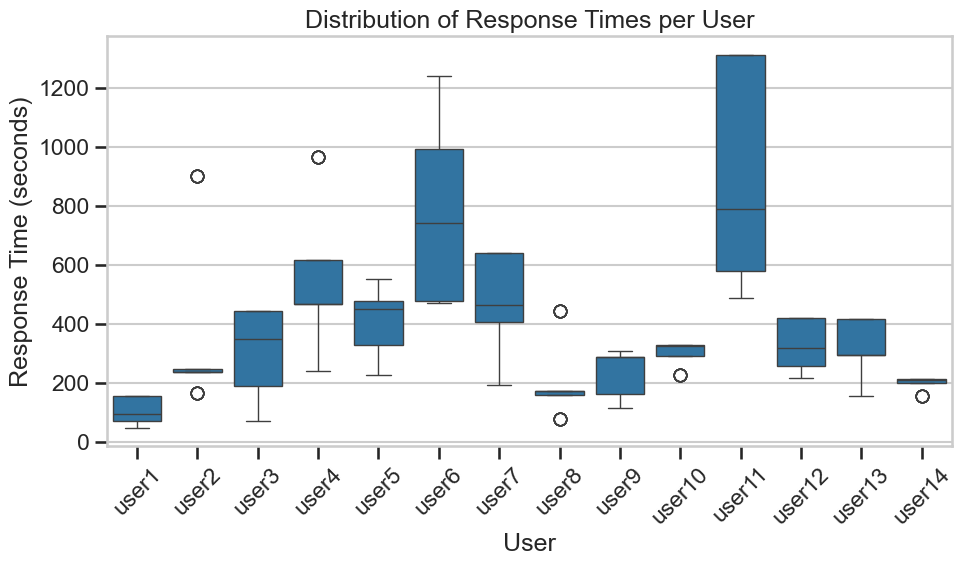

/var/folders/xg/275fmmmx52b3sq21l50dn4yw0000gn/T/ipykernel_90186/436860472.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title_counts.index, y=title_counts.values, palette="crest")


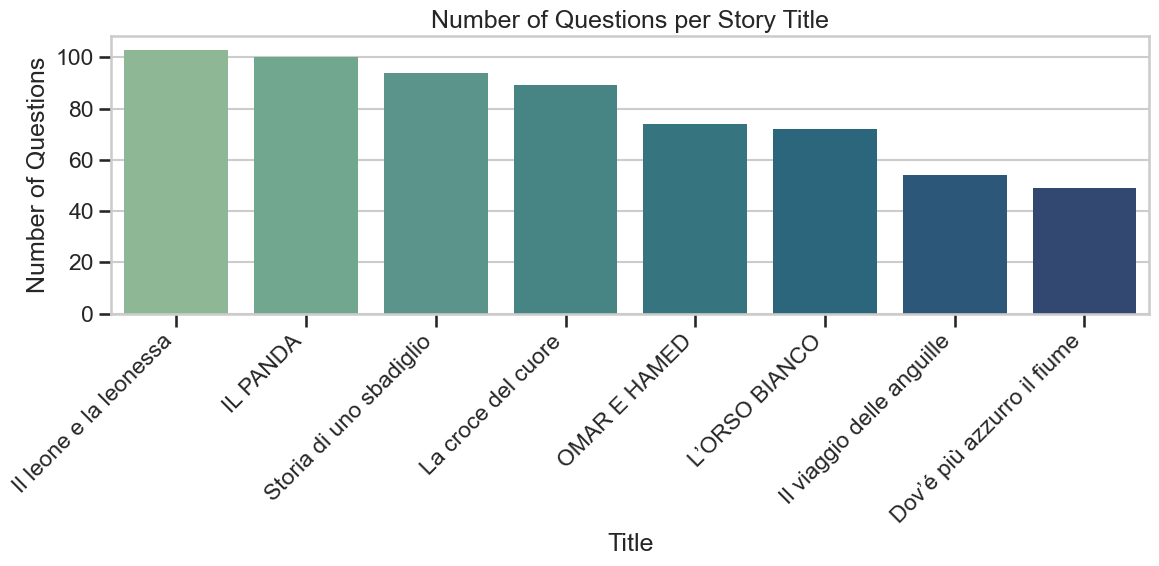

/var/folders/xg/275fmmmx52b3sq21l50dn4yw0000gn/T/ipykernel_90186/436860472.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="flare")


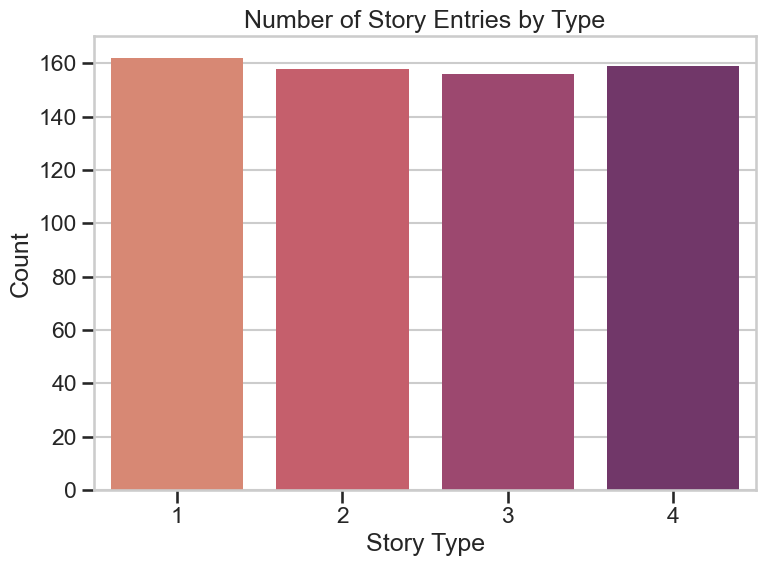

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load JSON file
with open("/data.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Normalize the nested JSON structure
df = pd.json_normalize(data, record_path=["result"], meta=["id_user", "user", "title", "type", "time"])

# Convert time to numeric
df["time"] = pd.to_numeric(df["time"], errors="coerce")

# Set plot style
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context("talk")

# === Plot 1: Response Time per User ===
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="user", y="time")
plt.title("Distribution of Response Times per User")
plt.xlabel("User")
plt.ylabel("Response Time (seconds)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/plot_response_time_per_user.png", dpi=300)
plt.show()

# === Plot 2: Number of Questions per Title ===
plt.figure(figsize=(12, 6))
title_counts = df["title"].value_counts().sort_values(ascending=False)
sns.barplot(x=title_counts.index, y=title_counts.values, palette="crest")
plt.title("Number of Questions per Story Title")
plt.xlabel("Title")
plt.ylabel("Number of Questions")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("plots/plot_questions_per_title.png", dpi=300)
plt.show()

# === Plot 3: Number of Entries by Story Type ===
plt.figure(figsize=(8, 6))
type_counts = df["type"].value_counts().sort_index()
sns.barplot(x=type_counts.index, y=type_counts.values, palette="flare")
plt.title("Number of Story Entries by Type")
plt.xlabel("Story Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("plots/plot_entries_by_type.png", dpi=300)
plt.show()
